In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\grego\AppData\Local\Temp/ipykernel_2392/3609341226.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\importlib\\_bootstrap.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\importlib\\_bootstrap_external.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\codecs.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\encodings\\aliases.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\encodings\\__init__.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\encodings\\utf_8.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\encodings\\cp1252.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\encodings\\latin_1.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\abc.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\io.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\stat.py": 1630350135.0, "C:\\Users\\grego\\Anaconda3\\envs\\py39\\lib\\_collections_abc.py": 1630350135.0, "C:\\Users\\grego\\Anacon

In [2]:
# Set up Google Colab runtime
import sys
import warnings
warnings.filterwarnings("ignore") # stop warnings for the sake of presentation
if "google.colab" in sys.modules:
    print("Setting up Google Colab... ")
    !git clone https://github.com/Strabes/Intro-to-NLP.git intro-to-nlp
    %cd intro-to-nlp
    from install import install_requirements
    install_requirements()
    from IPython.display import HTML, display

    def set_css():
        display(HTML('''
          <style>
          pre {
            white-space: pre-wrap;
          }
          </style>
          '''))
    get_ipython().events.register('pre_run_cell', set_css)

In [3]:
from sklearn.datasets import fetch_20newsgroups

d_train = fetch_20newsgroups(
    subset="train",
    remove=('headers','footers','quotes'),
    shuffle=True,
    random_state=42)

d_test = fetch_20newsgroups(
    subset="test",
    remove=('headers','footers','quotes'),
    shuffle=True,
    random_state=42)

print("The topics in the dataset are: " +
  ", ".join([f"'{x}'" for x in d_train["target_names"]]))

The topics in the dataset are: 'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'


In [4]:
for text in d_train["data"][:3]:
    print("-"*50)
    print(text.replace("\\"," "))

--------------------------------------------------
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
--------------------------------------------------
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please 

In [5]:
import nltk

example = d_train["data"][0]

def word_tokenize(text):
    x = nltk.word_tokenize(text.replace("\\"," "))
    return x

example_tokenized = word_tokenize(example)

print(example + "\n ==> ")
print(", ".join([f"'{t}'" for t in example_tokenized]))

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
 ==> 
'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.',

In [6]:
from itertools import islice
dict(islice({j:i for i,j in enumerate(set(example_tokenized))}.items(),10))

{'other': 0,
 '.': 1,
 'made': 2,
 'name': 3,
 'whatever': 4,
 'I': 5,
 '60s/': 6,
 '2-door': 7,
 'of': 8,
 'This': 9}

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(
    tokenizer = word_tokenize,
    max_features = 1000, # max number of tokens in our vocabulary
    lowercase = False)

# Train the vocabulary on 1000 example texts
count_vectorizer.fit(d_train["data"][:1000])

print("Here's a subset of our vocabulary:")
dict(islice(count_vectorizer.vocabulary_.items(),10))

Here's a subset of our vocabulary:


{'I': 146,
 'was': 948,
 'wondering': 979,
 'if': 572,
 'anyone': 313,
 'out': 731,
 'there': 893,
 'could': 414,
 'me': 659,
 'on': 718}

In [8]:
pd.DataFrame(
    count_vectorizer.transform(d_train["data"][:1000]).toarray(),
    columns = count_vectorizer.get_feature_names_out().tolist())

,!,#,$,%,&,','','AS,'AX,'d,...,x-Soviet,year,years,yes,yet,you,your,{,|,}
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,3,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,1,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [9]:
import sklearn

ENGLISH_STOP_WORDS = sklearn.feature_extraction._stop_words.ENGLISH_STOP_WORDS

print("Here are the stopwords we'll remove:\n")
print(", ".join(ENGLISH_STOP_WORDS))

Here are the stopwords we'll remove:

during, many, yours, its, behind, found, something, before, besides, he, how, be, hereafter, amongst, much, yet, then, once, system, describe, until, that, alone, seeming, nothing, might, nobody, you, ltd, next, well, mill, though, again, fifteen, had, three, across, four, former, ours, please, thus, most, none, above, should, two, can, being, ten, because, may, some, within, thru, into, whoever, wherever, him, these, who, by, detail, the, re, become, thence, bill, anywhere, now, neither, eg, towards, perhaps, herein, both, been, elsewhere, several, this, becoming, twelve, from, done, very, seems, about, even, for, so, noone, his, whenever, other, although, latterly, already, show, any, after, cry, could, we, least, another, six, down, cannot, while, toward, seemed, find, yourselves, without, per, side, which, only, must, back, anyhow, hereupon, would, there, our, here, thereupon, she, anyway, otherwise, do, are, up, beside, is, against, few, never

In [10]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

stemming_example_words = ["stop","stops","stopping","stopped"]

for word in stemming_example_words:
    print(f"The stem of '{word}' is '{porter_stemmer.stem(word)}'")

The stem of 'stop' is 'stop'
The stem of 'stops' is 'stop'
The stem of 'stopping' is 'stop'
The stem of 'stopped' is 'stop'


In [11]:
import re
import sklearn

def word_tokenize(text, stopwords = ENGLISH_STOP_WORDS):
    """Tokenize a string by:
    1. Tokenize words
    2. Filtering out tokens that don't contain at least
       two consecutive alpha-numeric characters or start with
       and apostrophe.
    3. Lowercase characters
    4. Remove stopwords.
    5. Remove repeated words.
    4. Apply the Porter stemmer
    """
    x = nltk.word_tokenize(text.replace("\\"," "))
    x = [t for t in x if re.search("[A-Za-z0-9]{2,}",t) and not re.match("'.*",t)]
    x = [t.lower() for t in x] # lowercase
    x = [t for t in x if t not in stopwords]
    x = [x[i] for i in range(len(x)) if i==0 or x[i] != x[i-1]]
    return [porter_stemmer.stem(t) for t in x]

count_vectorizer = CountVectorizer(
    #tokenizer=word_tokenize,
    analyzer=word_tokenize,
    max_features=100
    )

count_vectorizer.fit(d_train["data"][:1000])

pd.DataFrame(count_vectorizer.transform(d_train["data"][:1000]).toarray(),
columns = count_vectorizer.get_feature_names_out().tolist())

,applic,argument,armenian,ask,believ,better,ca,call,car,case,...,tri,true,understand,use,want,way,window,word,work,year
0,0,0,0,0,0,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,0,0,0,0,0


In [12]:
import random
random.seed(1)

count_vectorizer = CountVectorizer(
    tokenizer=word_tokenize,
    max_features=2000,
    ngram_range=(1,4), # n-grams from 1-4
    max_df = 0.5, # tokens occurring in a higher proportion of documents than this are left out
    min_df = 0.0001 # tokens occurring in a lower proportion of documents than this are left out
    )

count_vectorizer.fit(d_train["data"])

random_sample_n_grams = random.sample(
    [i for i in count_vectorizer.get_feature_names_out() if re.search(" ",i)],10)

print("Some example n-grams for n>=2 \n")

print(", ".join([f"'{t}'" for t in random_sample_n_grams]))

Some example n-grams for n>=2 

'doe know', 'serial number', 'avail anonym ftp', 'hard disk', 'disk drive', 'new york', 'make sure', 'ms. myer', 'long time', 'ftp site'


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("count_vectorizer", count_vectorizer),
    ("tfidf_transformer", TfidfTransformer()),
    ("logistic_reg", LogisticRegression(multi_class='multinomial'))])

pipe.fit(d_train["data"],d_train["target"])

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(max_df=0.5, max_features=2000, min_df=0.0001,
                                 ngram_range=(1, 4),
                                 tokenizer=<function word_tokenize at 0x000001FC4BFFE8B0>)),
                ('tfidf_transformer', TfidfTransformer()),
                ('logistic_reg',
                 LogisticRegression(multi_class='multinomial'))])

In [14]:
from sklearn.metrics import classification_report

test_preds = pipe.predict(d_test["data"])

print(
    f"Classification report for classifier:\n" +
    f"""{classification_report(
        d_test['target'], test_preds,
        target_names=d_test['target_names'])}\n""")

Classification report for classifier:
                          precision    recall  f1-score   support

             alt.atheism       0.41      0.42      0.41       319
           comp.graphics       0.56      0.59      0.57       389
 comp.os.ms-windows.misc       0.57      0.55      0.56       394
comp.sys.ibm.pc.hardware       0.58      0.56      0.57       392
   comp.sys.mac.hardware       0.63      0.56      0.59       385
          comp.windows.x       0.70      0.61      0.65       395
            misc.forsale       0.71      0.74      0.72       390
               rec.autos       0.66      0.62      0.64       396
         rec.motorcycles       0.42      0.70      0.53       398
      rec.sport.baseball       0.72      0.75      0.73       397
        rec.sport.hockey       0.83      0.79      0.81       399
               sci.crypt       0.81      0.63      0.71       396
         sci.electronics       0.48      0.53      0.50       393
                 sci.med       0.68  

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 20

lda = LatentDirichletAllocation(
    n_components=n_components,
    #max_iter=5,
    #learning_method="online",
    #learning_offset=50.0,
    random_state=0,
)

lda_pipe = Pipeline([
    ("count_vectorizer", count_vectorizer),
    ("tfidf_transformer", TfidfTransformer()),
    ("lda", lda)])

lda_pipe.fit(d_train["data"])

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(max_df=0.5, max_features=2000, min_df=0.0001,
                                 ngram_range=(1, 4),
                                 tokenizer=<function word_tokenize at 0x000001FC4BFFE8B0>)),
                ('tfidf_transformer', TfidfTransformer()),
                ('lda',
                 LatentDirichletAllocation(n_components=20, random_state=0))])

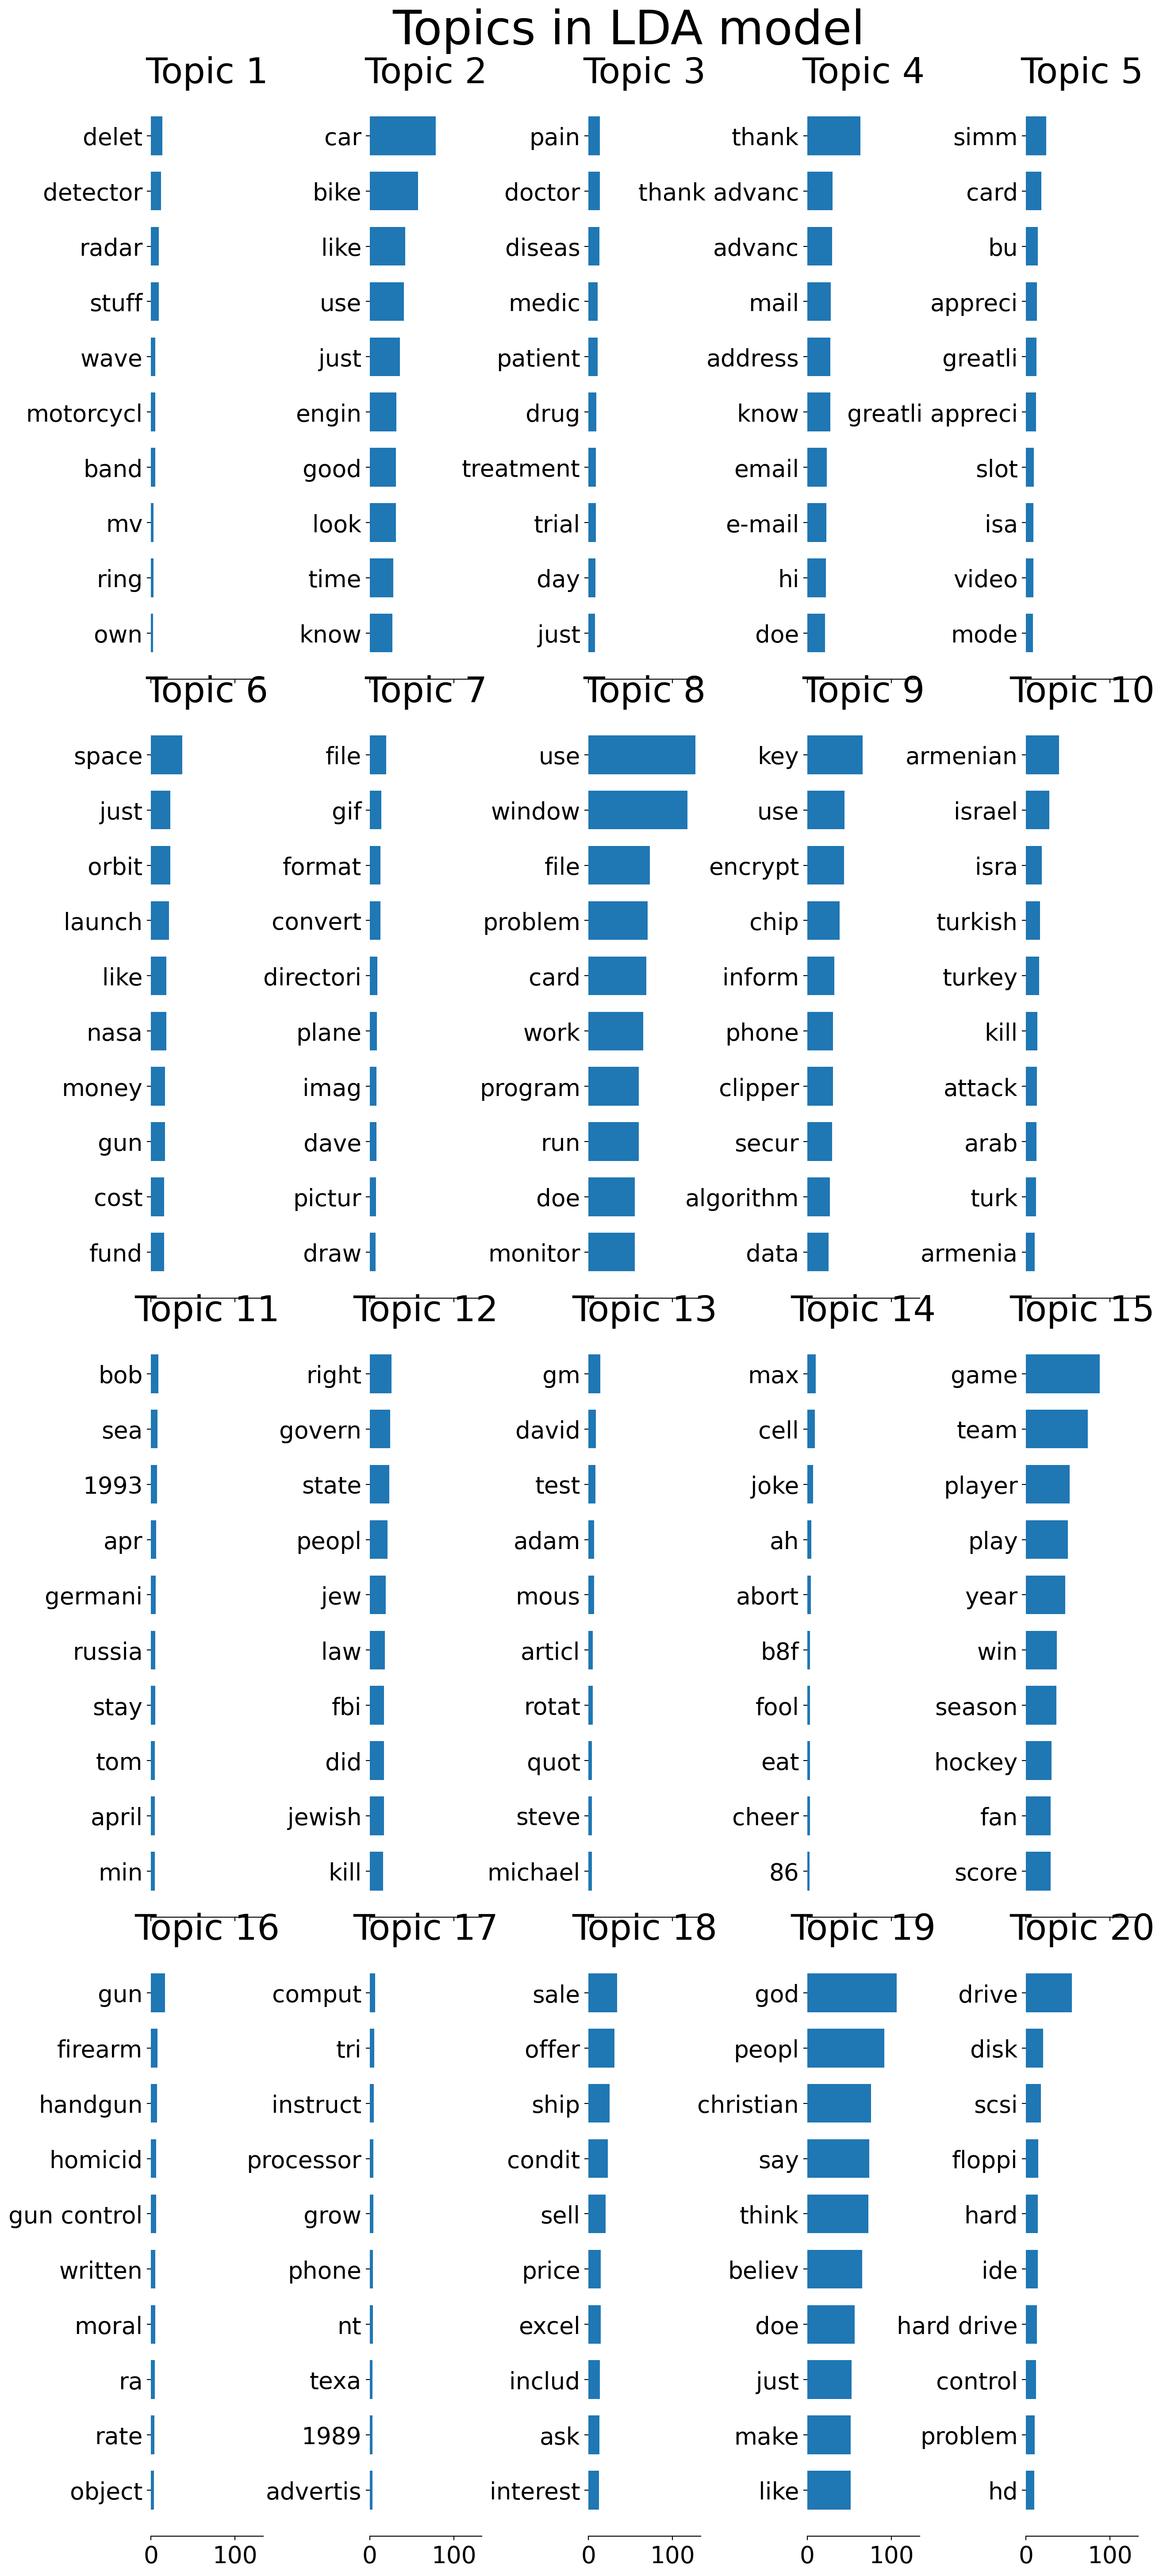

In [16]:
#| label: top-tokens-per-topic
#| fig-cap: Top token for each discovered topic
from utils import plot_top_words
n_top_words=10
tf_feature_names = lda_pipe["count_vectorizer"].get_feature_names_out()
fig = plot_top_words(lda_pipe["lda"], tf_feature_names, n_top_words, "Topics in LDA model")

#fig.tight_layout();

In [17]:
lda_test_preds = lda_pipe.transform(d_test["data"])

In [18]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, to_hex
tab20 = plt.get_cmap("tab20")
lcm = ListedColormap(tab20(range(20)))

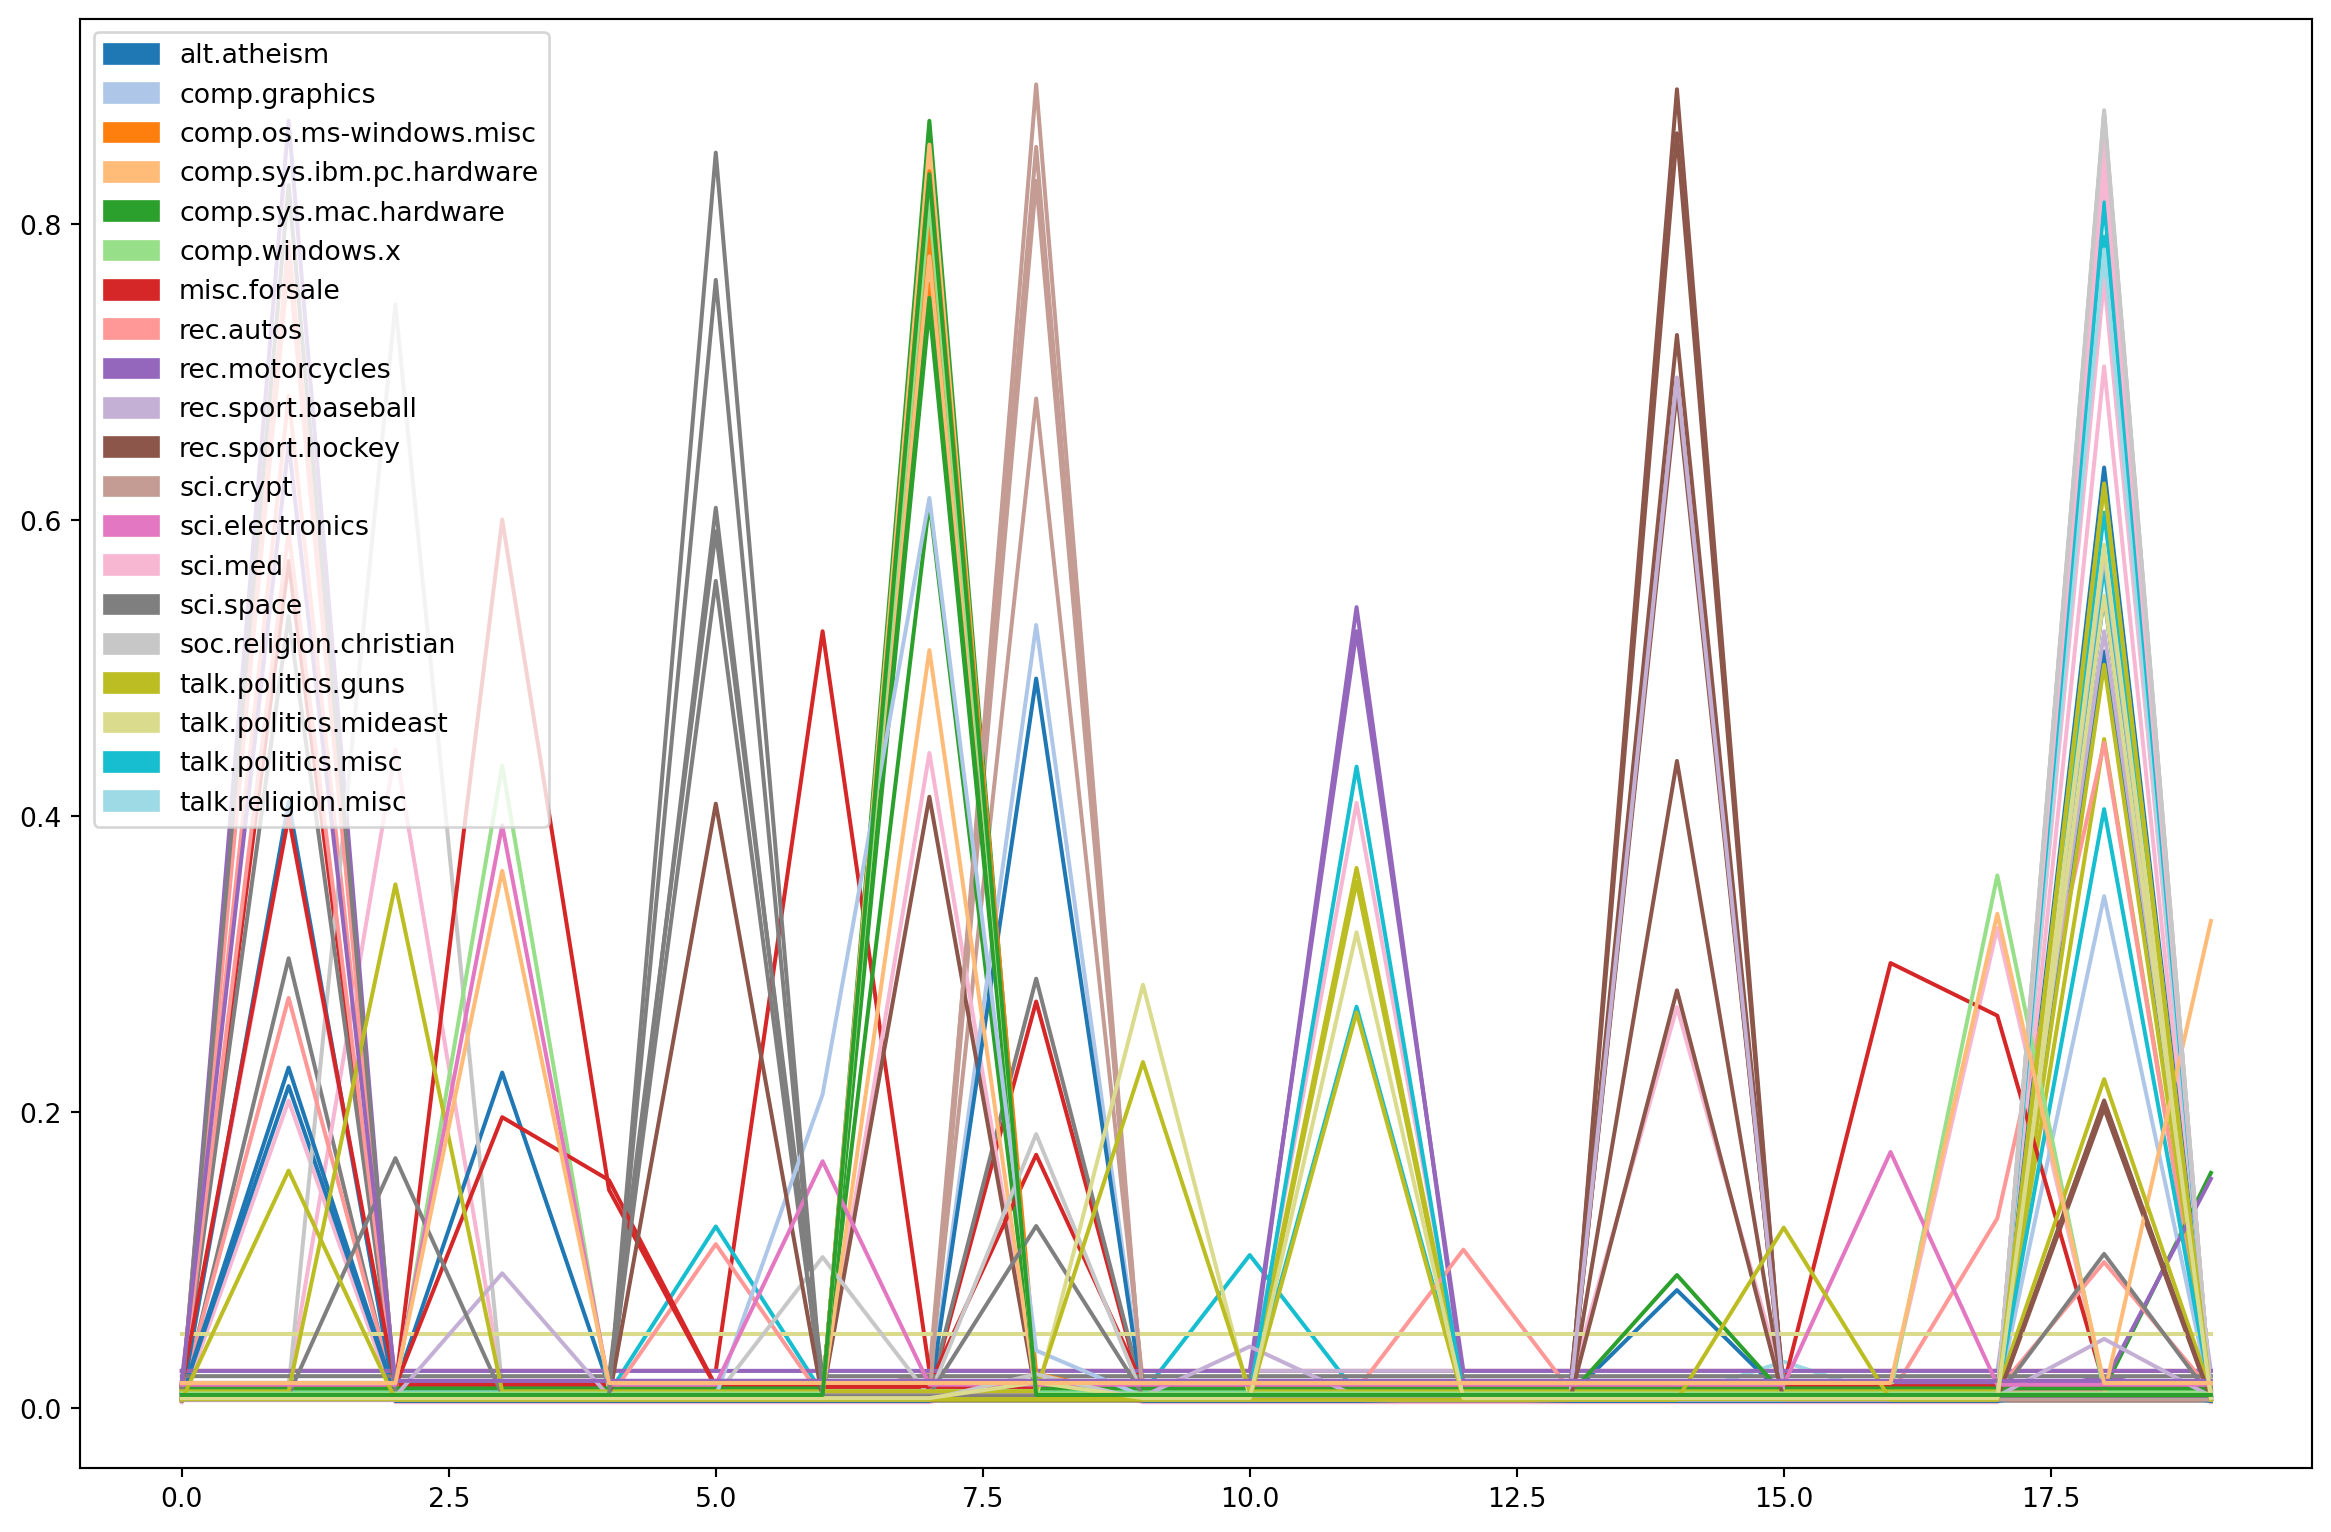

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
for row in (pd.DataFrame(lda_test_preds)
  .assign(target = d_test["target"])
  .sample(100, random_state=0)
  .iterrows()):
    ax.plot(range(n_components),row[1][:n_components]
    #,c=row[1]["target"]
    , c=lcm(int(row[1]["target"]))
    )
from matplotlib import patches
handles = [patches.Patch(color = lcm(i), label=d_test["target_names"][i]) for i in range(20)]
ax.legend(handles=handles)

In [20]:
from sklearn import manifold
tsne = manifold.TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=200,
        learning_rate="auto",
        n_iter=300,
    )
Y = tsne.fit_transform(lda_test_preds)

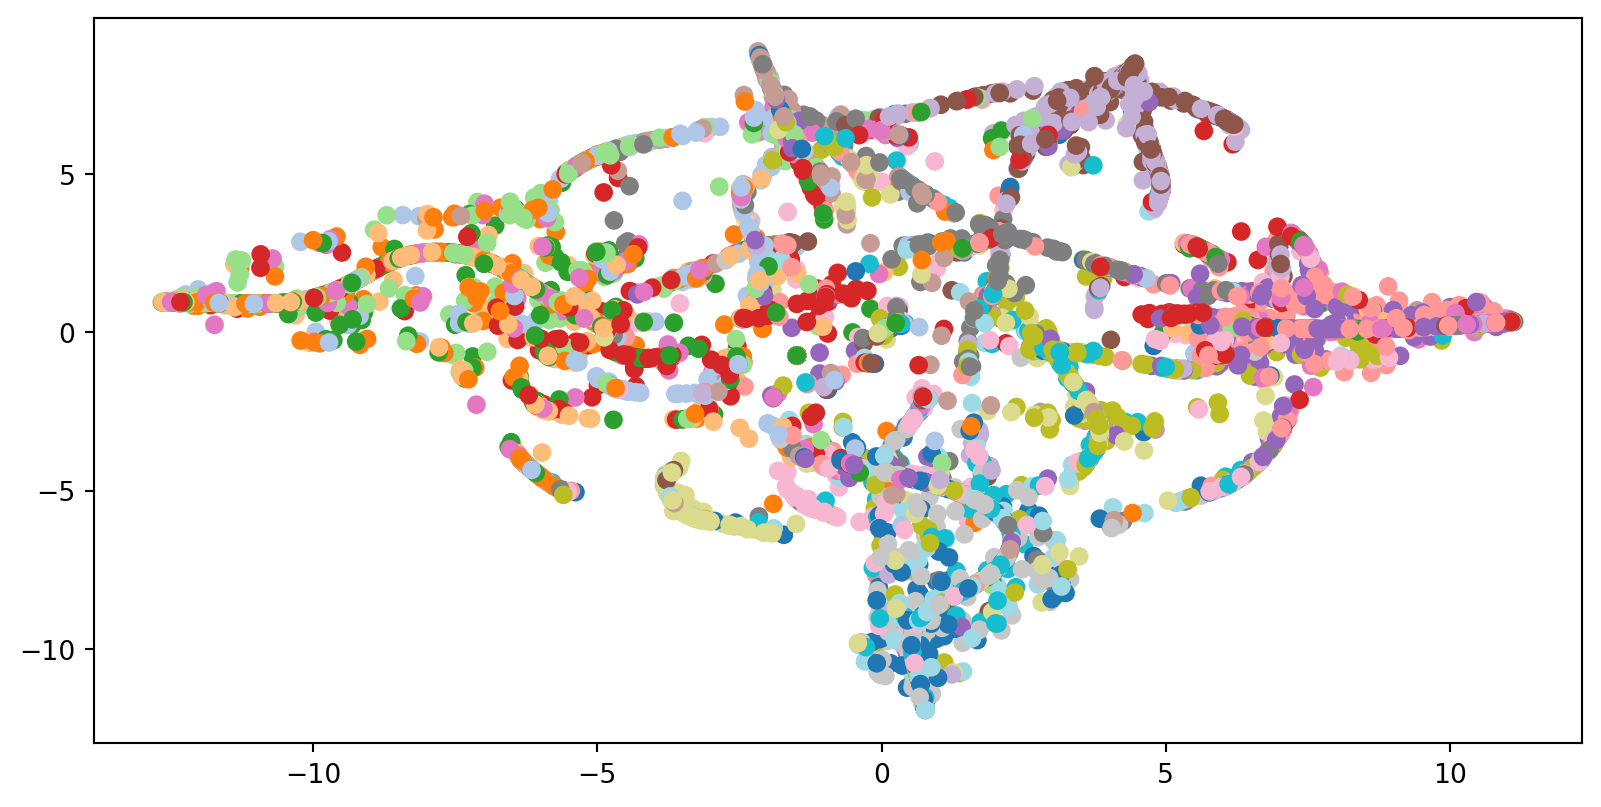

In [21]:
plt.scatter(Y[:,0],Y[:,1],
c=d_test["target"],
cmap="tab20"
#c=[d_test["target_names"][i] for i in d_test["target"]]
)

In [22]:
from transformers import pipeline, set_seed
from datasets import load_dataset, load_metric
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize

In [23]:
dataset = load_dataset("cnn_dailymail", version="3.0.0")
print(f"Features: {dataset['train'].column_names}")

Using custom data configuration default


Reusing dataset cnn_dailymail (C:\Users\grego\.cache\huggingface\datasets\cnn_dailymail\default\3.0.0\e6f7373c4552f36af359a1fc84b24352f22070483560e87f524e1730f8cf5539)


  0%|          | 0/3 [00:00<?, ?it/s]

Features: ['article', 'highlights', 'id']


In [24]:
sample_idx = 0
sample = dataset["test"][sample_idx]
print(f"""
Article (total length: {len(sample["article"])}):
""")
print(sample["article"])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (total length: 3612):

(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, spea

In [25]:
# Download Google's PEGASUS model that was fine-tuned on CNN/Daily Mail

pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")

In [26]:
encoded = pipe.tokenizer.encode("""
Hello. My name is Greg Strabel
and I'm a data scientist. Supercalifragilisticexpialidocious.
""")

print(f"Encoded text: {', '.join([str(i) for i in encoded])}")
decoded = [pipe.tokenizer.decode(i) for i in encoded]
print(f"Decoded text: {', '.join([str(i) for i in decoded])}")

Encoded text: 8087, 107, 600, 442, 117, 8303, 26159, 10539, 111, 125, 131, 208, 114, 335, 9732, 107, 2422, 62955, 40972, 4935, 10855, 39053, 7434, 15398, 35898, 107, 1
Decoded text: Hello, ., My, name, is, Greg, Stra, bel, and, I, ', m, a, data, scientist, ., Super, cali, frag, il, istic, exp, ial, ido, cious, ., </s>


In [27]:
sample_text = dataset["test"][sample_idx]["article"][:2000]

pipe_out = pipe(sample_text)
summary = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")
print(summary)

The Palestinian Authority officially becomes the 123rd member of the International Criminal Court.
The move gives the court jurisdiction over alleged crimes in Palestinian territories .
